## Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [32]:
df = pd.read_csv("../cleaned_data/auto_mpg_fixed_cleaned.csv", index_col=0)
df.drop('origin', axis=1, inplace=True)

df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,27.0
394,4,97.0,52,2130,24.6,82,44.0
395,4,135.0,84,2295,11.6,82,32.0
396,4,120.0,79,2625,18.6,82,28.0


## Checking Data

<AxesSubplot:>

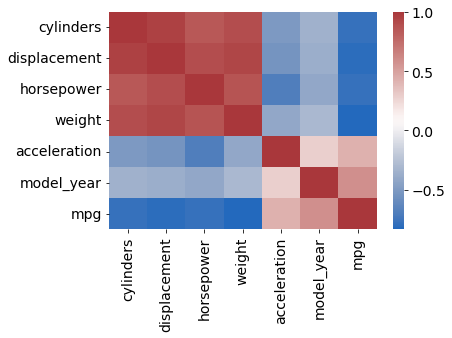

In [33]:
# Check to make sure that no columns have perfect colinearity
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Scaling Data

In [34]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.239362
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.159574
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.239362
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.186170
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.212766
...,...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.478723
388,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.930851
389,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.611702
390,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.505319


## Breaking Data in X and y

In [35]:
X = df.iloc[:,:-1]

In [36]:
y = df.iloc[:,-1]

# Generating Models

In [37]:
# Imports to build layered neural nets
from keras.models import Sequential
from keras.layers import Dense

In [38]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 10

# Defining batch size
bs = 1000

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [39]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [40]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 0s 341ms/step - loss: 0.0523
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 1/10
1/1 [==============================] - 0s 287ms/step - loss: 0.0696
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0689
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          3.79e-135
Time:                        17:23:06   Log-Likelihood:                 385.33
No. Observations:                 392   AIC:                            -756.7
Df Residuals:                     385   BIC:                            -728.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


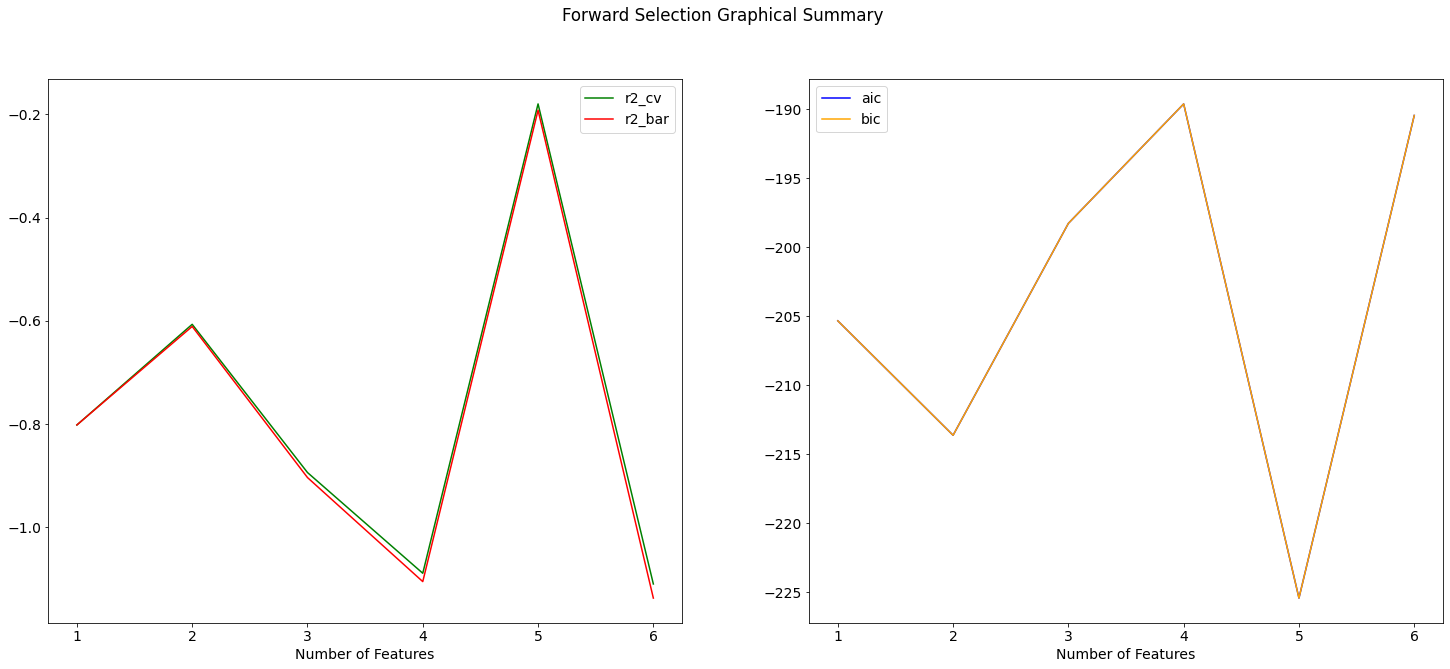

In [41]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [42]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [43]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 0s 251ms/step - loss: 0.1577
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.1487
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1403
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.1325
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1251
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.1183
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1120
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1063
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0961
Epoch 1/10
1/1 [==============================] - 0s 258ms/step - loss: 0.1050
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0

In [44]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          3.79e-135
Time:                        17:23:23   Log-Likelihood:                 385.33
No. Observations:                 392   AIC:                            -756.7
Df Residuals:                     385   BIC:                            -728.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4

KeyboardInterrupt: 

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 5 Layer Neural Networks

### Sigmoid Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)